In [2]:
# importar datos a un dataframe de master.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Leer el archivo master.csv
df = pd.read_csv('datosLimpios.csv')
df.head()

,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,21,312900,6.71,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1987,16,308000,5.19,2.156625e+09,796.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1987,14,289700,4.83,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1987,1,21800,4.59,2.156625e+09,796.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1987,9,274300,3.28,2.156625e+09,796.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Probabilidad de suicidio

Se usará la columna de suicides/100k pop que muestra la cantidad de suicidios por cada 100k habitantes.

In [3]:
y = df["suicides/100k pop"]
X = df.drop(["suicides/100k pop"], axis=1)

Hay que convertir los valores numericos a categoricos, es decir colocar umbrales para poder obtener que probabilidad de suicidio tiene el pais o el input.

In [4]:
bins = np.linspace(0, 224.97, 21)
labels = ["5%", "10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%", "55%", "60%", "65%", "70%", "75%", "80%", "85%", "90%", "95%", "100%"]
y['suicides/100k pop'] = pd.cut(df["suicides/100k pop"], bins, labels=labels, include_lowest=True)
y = y['suicides/100k pop']
y.head()

0    5%
1    5%
2    5%
3    5%
4    5%
Name: suicides/100k pop, dtype: category
Categories (20, object): ['5%' < '10%' < '15%' < '20%' ... '85%' < '90%' < '95%' < '100%']

In [5]:
print(bins)

[  0.      11.2485  22.497   33.7455  44.994   56.2425  67.491   78.7395
  89.988  101.2365 112.485  123.7335 134.982  146.2305 157.479  168.7275
 179.976  191.2245 202.473  213.7215 224.97  ]


In [6]:
# imprimir la cantidad de datos en cada bin
y.value_counts()


suicides/100k pop
5%      18175
10%      4673
15%      2255
20%      1051
25%       522
30%       337
35%       273
40%       233
45%       121
50%        73
55%        45
60%        28
65%        10
80%         9
70%         6
75%         4
85%         3
95%         1
100%        1
90%         0
Name: count, dtype: int64

In [7]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X_train)
print(y_train)

       year  suicides_no  population  gdp_for_year  gdp_per_capita  age_15-24  \
668    1991           77     2310000  1.897200e+11          6404.0      False   
18772  2005           40      575210  8.734654e+09          1704.0      False   
8703   2009            8      105083  2.870625e+09          3765.0      False   
16909  2013           16     1815829  1.274443e+12         11478.0      False   
20924  2015           11     1088177  1.779111e+11          9431.0      False   
...     ...          ...         ...           ...             ...        ...   
21575  2010            0       13885  1.381968e+09          8557.0      False   
5390   1995           32     1219884  7.344706e+10          5695.0       True   
860    2007          155     4601874  2.875305e+11          7918.0      False   
15795  2010            0       30688  2.588176e+09          7806.0      False   
23654  1995          273     4106700  6.129397e+11         16444.0      False   

       age_25-34  age_35-54

In [9]:
# Entrenar el modelo de naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
# Hacer predicciones
y_pred = model.predict(X_test)
print(y_pred)

['5%' '5%' '5%' ... '5%' '5%' '5%']


In [11]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.6495327102803738


In [12]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    4   31    0    0    0    0    0    0  902    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    1   28    0    0    0    0    0    0  393    0    0    0    0
     0    0    0    0]
 [   0    0   10    0    0    0    0    0    0  202    0    0    0    0
     0    0    0    0]
 [   0    1    5    0    0    0    0    0    0   98    0    0    0    0
     0    0    0    0]
 [   0    0    2    0    0    0    0    0    0   56    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   46    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   55    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   22    0    0    0    0
     0    0    0    0]
 [   0   35   55    0    0    0    0    0    0 3586    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   1

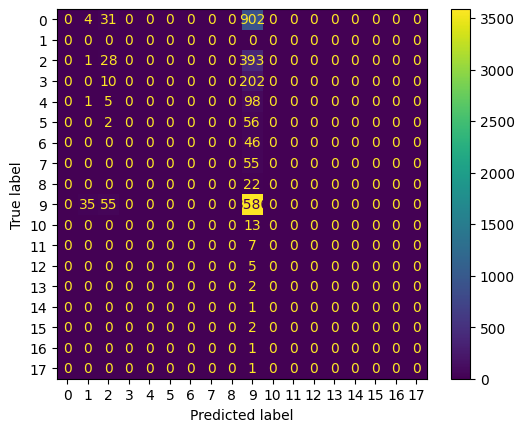

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
despliegue = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
despliegue.plot()

In [14]:
from sklearn.metrics import classification_report
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))

Reporte de clasificación: 
              precision    recall  f1-score   support

         10%       0.00      0.00      0.00       937
        100%       0.00      0.00      0.00         0
         15%       0.21      0.07      0.10       422
         20%       0.00      0.00      0.00       212
         25%       0.00      0.00      0.00       104
         30%       0.00      0.00      0.00        58
         35%       0.00      0.00      0.00        46
         40%       0.00      0.00      0.00        55
         45%       0.00      0.00      0.00        22
          5%       0.67      0.98      0.79      3676
         50%       0.00      0.00      0.00        13
         55%       0.00      0.00      0.00         7
         60%       0.00      0.00      0.00         5
         65%       0.00      0.00      0.00         2
         70%       0.00      0.00      0.00         1
         80%       0.00      0.00      0.00         2
         85%       0.00      0.00      0.00         1


# Mejorar el modelo

In [15]:
# Utilizar validación cruzada
from sklearn.model_selection import GridSearchCV
naive_bayes = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100),  # Var_smoothing values
}
grid = GridSearchCV(naive_bayes, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [16]:
grid.best_score_

0.647061267754929

In [17]:
grid.best_params_

{'var_smoothing': 1.0}

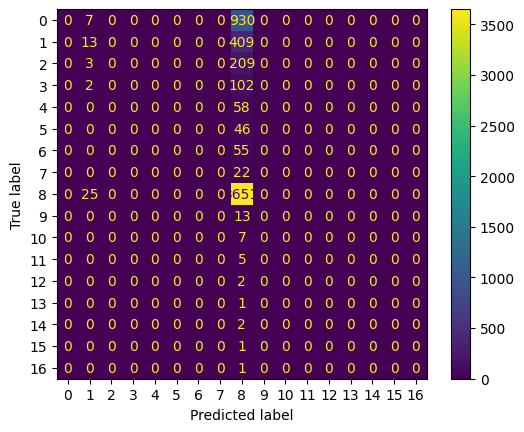

In [18]:
best = grid.best_estimator_
best.fit(X_train, y_train)
y_pred = best.predict(X_test)
despliegue = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
despliegue.plot()

In [19]:
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))

Reporte de clasificación: 
              precision    recall  f1-score   support

         10%       0.00      0.00      0.00       937
         15%       0.26      0.03      0.06       422
         20%       0.00      0.00      0.00       212
         25%       0.00      0.00      0.00       104
         30%       0.00      0.00      0.00        58
         35%       0.00      0.00      0.00        46
         40%       0.00      0.00      0.00        55
         45%       0.00      0.00      0.00        22
          5%       0.66      0.99      0.79      3676
         50%       0.00      0.00      0.00        13
         55%       0.00      0.00      0.00         7
         60%       0.00      0.00      0.00         5
         65%       0.00      0.00      0.00         2
         70%       0.00      0.00      0.00         1
         80%       0.00      0.00      0.00         2
         85%       0.00      0.00      0.00         1
         95%       0.00      0.00      0.00         1
